# **Formatos de imagen**
## Procesamiento de Imagen y Señal

In [2]:
import os
import sys

##

import warnings
warnings.filterwarnings('ignore')

##

import IPython.display as ipd

import PIL

from PIL import Image  

from imageio import imread, imwrite

from skimage import io
from skimage.color import rgb2gray

import cv2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im

from matplotlib import colormaps
from matplotlib.colors import LinearSegmentedColormap

import requests
import urllib.request

In [3]:
# Funciones auxiliares
path = "code/"

# Add the directory containing your module to the Python path (wants absolute paths)
sys.path.append(os.path.abspath(path))

from f_plot import *
from f_color import *
from f_get_random import *

---

# **Librerías de *Python* para el tratamiento de imágenes**

Entre las librerías más utilizadas para el tratamiento de imágenes podemos encontrar las siguientes librerías:
  * `matplotlib`
  * `Pillow` o *Python Imaging Library* (PIL)
  * `OpenCV`
  * `Scikit-Image` o `skimage`
  * `imageio`
  * `Tensorflow`

<hr style="border: 1px solid green" />

### **matplotlib**

`matplotlib` es una de las librerías más utilizadas en Python para la visualización de datos, y ofrece una variedad amplia de usos y aplicaciones como la representación de imágenes y mapas de color.

Dos de las funciones más importantes para leer y visualizar imágenes con esta librería son:
  * `matplotlib.image.imread()`
  * `matplotlib.pyplot.imshow()`


<hr style="border: 1px solid green" />

### ***Python Imaging Library* (`PIL`)**

La librería *Python Imaging Library* (`PIL`) es una de las principales bibliotecas para la manipulación de imágenes en Python. Desafortunadamente, su desarrollo se ha estancado, con su última versión en 2009.

No obstante, existe una bifurcación de `PIL` conocida como `Pillow` que es una biblioteca adicional gratuita y de código abierto para el lenguaje de programación Python que agrega soporte para abrir, manipular y guardar muchos formatos de archivo de imagen diferentes.

En `PIL` las imágenes son imágenes raster.

Ofrece funciones estándar para la manipulación de imágenes tales como:
  * Lectura y visualización, `open()` y `show()`
  * Obtención del número de bandas, `.getbands()`
  * Manipulaciones a nivel de píxel, `.getpixel()` y `.putpixel`
  * Manipulación de enmascaramiento y transparencia, `.apply_transparency()`
  * Filtrado de imágenes, como desenfoque, contorno, suavizado o búsqueda de bordes, `.filter()`
  * Mejora de la imagen, como nitidez, ajuste de brillo, contraste o color,
  * Agregar texto a las imágenes, ...

Soporta una amplia gama de formatos de imagen, incluyendo JPEG, PNG, BMP, GIF, PPM, TIFF, entre otros (atributo: `Image.format`).

Más información sobre los formatos de imagen: [**Referencia**](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html)

El modo de una imagen define el tipo y la profundidad de un píxel en la imagen. En nuestro caso, el atributo `Image.mode` puede ser: Blanco y negro `1`, escala de grises `L`, color `RGB` o color `CMYK`.

Más información sobre esta librería: [**Referencia**](https://pillow.readthedocs.io/en/stable/reference/Image.html)

<hr style="border: 1px solid green" />

### ***Open Source Computer Vision* (OpenCV)**

*Open Source Computer Vision* (`OpenCV`) es un software de manipulación y procesamiento de imágenes más avanzado que `PIL`. Se ha implementado en varios lenguajes y su uso está muy extendido. Nótese que `OpenCV` es 1.4 veces más rápido que `PIL`.

En `OpenCV` las imágenes son imágenes raster tratadas como una matriz estándar de `numpy`.

Dos de las funciones más importantes para leer y visualizar imágenes son:
  * `cv2.imread()`
  * `cv2.imshow()`

Algunos de los usos más comunes de esta librería son:
* Procesamiento de imágenes, como cambio de color y tamaño, aplicación de filtros y detección de bordes, análisis de regiones de interés, normalización de la luminosidad y contraste, etc.
* Detección y reconocimiento de rostros e identificación de rasgos faciales
* Reconocimiento de objetos tanto en imágenes como en vídeo
* Seguimiento de objetos y movimiento en tiempo real
* Visión estéreo y reconstrucción 3D, creación de mapas de profundidad, ...
* Realidad aumentada

Las imágenes en color tanto en `skimage` y `OpenCV` tienen 3 dimensiones: anchura, altura y color. RGB y BGR utilizan el mismo espacio de color, excepto que el orden de los colores está invertido.

Para una imagen con colores a lo largo del último eje, la siguiente instrucción invierte efectivamente el orden de los colores, dejando las filas y columnas inalteradas.

<center> <code> imagen = imagen[:, :, ::-1] </code> </center>

Más información sobre esta librería: [**Referencia**](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)

<hr style="border: 1px solid green" />

### **skimage**
  
`Scikit-Image` es una librería de Python muy completa y popular en el ámbito del procesamiento de imágenes, gracias a la amplia variedad de algoritmos que ofrece y su fácil integración con otras bibliotecas científicas y numéricas de Python, como `NumPy` y `SciPy`.

En la librería `skimage` las imágenes son simplemente matrices `numpy`, que soportan una variedad de tipos de datos (`dtypes`). Para evitar distorsionar las intensidades de las imágenes asumimos que las imágenes utilizan los siguientes rangos `dtype`:

<center>

| Tipo | Rango |
|:---:|:---:|
| uint8 | $0$ a $255$ |
| uint16 | $0$ a $65535$ |
| uint32 | $0$ a $2^{32}-1$ |
| float | $-1$ a $1$ ó $0$ a $1$ |
| int8 | $-128$ a $127$ |
| int16 | $-32768$ a $32767$ |
| int32 | $-2^{31}$ a $2^{31}-1$ |
</center>

<br>

Algunas de las funciones de conversión más utilizadas de esta librería son:
  * `img_as_float()`
  * `img_as_ubyte()`
  * `img_as_uint()`
  * `img_as_int()`

Algunos de los usos más comunes de esta librería son:
* Manejo de imágenes, mediante funciones para leer, escribir y convertir entre diferentes formatos de imagen
* Filtros y transformaciones, tales como filtros de borde, de suavizado y realce así como rotaciones, escalados y traslaciones
* Segmentación de imágenes en regiones o en objetos individuales
* Análisis de textura
* Morfología
* Detección de características

Más información sobre esta librería: [**Referencia**](https://scikit-image.org/docs/stable/api/skimage.io.html)

<hr style="border: 1px solid green" />

### **imageio**

`imageio` es una biblioteca que ofrece una interfaz sencilla para escribir y leer una amplia variedad de datos de imágenes: imágenes animadas, vídeos, datos volumétricos, formatos científicos, etc.

Entre los formatos de archivo compatibles podemos citar: BMP, PNG, JPEG, TIFF y DICOM entre otros.

[**Más información**](https://imageio.readthedocs.io/en/v2.8.0/formats.html)

<hr style="border: 1px solid green" />

### **Tensorflow**

`Tensorflow` fue creado por el equipo de *Google Brain*, equipo de investigación de inteligencia artificial de aprendizaje profundo, y es una librería de código abierto para computación numérica y aprendizaje automático a gran escala. Reúne una gran gama de modelos y algoritmos de aprendizaje automático y aprendizaje profundo para ponerlos al servicio del usuario mediante una API de Python, lenguaje con el que el autor posee experiencia.

Esta librería permite cargar y preprocesar imágenes.

[**Más información**](https://www.tensorflow.org/tutorials/load_data/images)

---

**Ejemplo**: Librerías e imágenes locales con las diferentes librerías.

In [4]:
# Con funciones del paquete skimage
imagen0 = io.imread('images_formatos/Lena_gray.png')
# Salvar una imagen
io.imsave('www/imagen_skimage.png', imagen0)
print(imagen0.size)

# Con funciones del paquete imageio
imagen1 = imread('images_formatos/building_image.jpg')
# Salvar una imagen
imwrite('www/imagen_imageio.jpg', imagen1)
print(imagen1.size)

# Con funciones del paquete PIL
imagen2 = Image.open('images_formatos/test.png')
# Salvar una imagen
imagen2.save('www/test.png')
print(imagen2.size)

# Con funciones del paquete openCV
imagen3 = cv2.imread('images_formatos/imagen_RGB.jpg')
# Salvar una imagen
cv2.imwrite('www/imagen_openCV.jpg', imagen3)
print(imagen3.size)


FileNotFoundError: The directory '/home/ag6154lk/KISA/src/PIS/labs/www' does not exist

In [ ]:
lista_im = [imagen0, imagen1, imagen2, imagen3]
titulos = ['skimage', 'imageio', 'PIL', 'openCV']
plotN_im(l_im=lista_im, ncols=4, l_tit=titulos)

---

**Ejemplo**: Librerías e imágenes url con las diferentes librerías, `skimage`, `imageio`, `PIL` y `requests` y `openCV`.

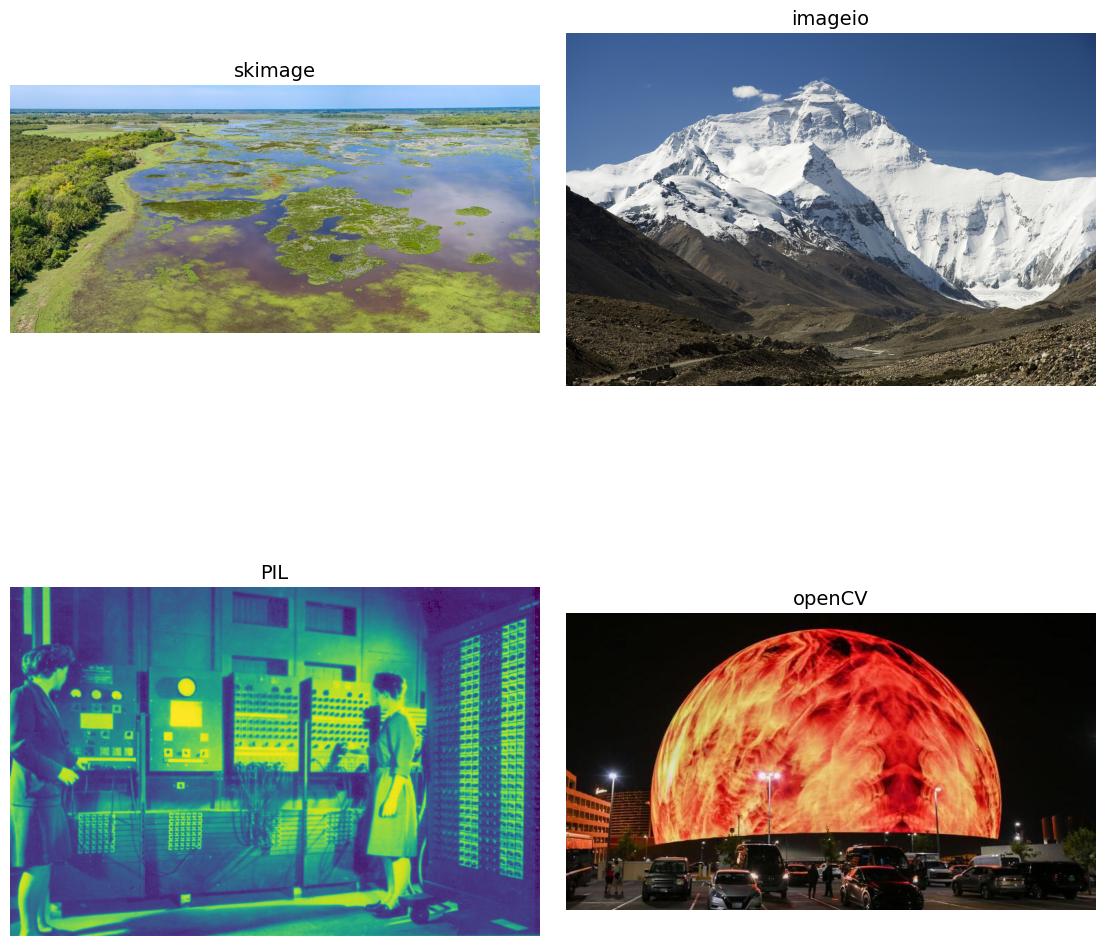

In [4]:
direccion0 = 'https://cdn.britannica.com/55/153455-050-2C3F33B9/aerial-view-Pantanal-Brazil.jpg'
direccion1 = 'https://upload.wikimedia.org/wikipedia/commons/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'
direccion2 = 'https://upload.wikimedia.org/wikipedia/commons/3/3b/Two_women_operating_ENIAC.gif'
direccion3 = 'https://ichef.bbci.co.uk/news/774/cpsprodpb/a3ee/live/e425d470-614b-11ee-86ad-fd31b9495361.jpg'

# Librería skimage 
imagen0 = io.imread(direccion0)

# Librería imageio
imagen1 = imread(direccion1)

# Librería PIL y requests
r = requests.get(direccion2, stream=True)
imagen2 = Image.open(r.raw)
# Librería openCV, requests y numpy

#imagen3 = cv2.imread(IMAGE-PATH) # Si la imagen está en un directorio local

r = urllib.request.urlopen(direccion3)
auxiliar = np.asarray(bytearray(r.read()), dtype="uint8")
imagen_bgr = cv2.imdecode(auxiliar, cv2.IMREAD_COLOR)
imagen3 = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)
lista_im = [imagen0, imagen1, imagen2, imagen3]

titulos = ['skimage', 'imageio', 'PIL', 'openCV']
plotN_im(l_im=lista_im, ncols = 2, l_tit = titulos)

---

**Ejemplo**: Podemos utilizar una imagen en `OpenCV` con la librería `skimage` y viceversa.

Si `cv_image` es una matriz de bytes sin signo, la librería `skimage` lo entenderá por defecto. Si se quiere trabajar con imágenes en coma flotante podemos utilizar la función `img_as_float()`

<center> <code> image = io.util.img_as_float(any_opencv_image) </code> </center>
  
<center> <code> cv_image = io.util.img_as_ubyte(any_skimage_image) </code> </center>

---

# Conversión entre imágenes de tipo RGB y escala de grises

* De **RGB a escala de grises** con la función `rgb2gray()` de `skimage.color`.

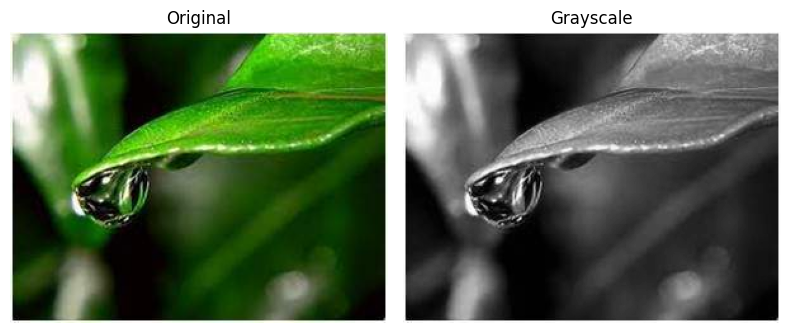

In [5]:
im_skimage = io.imread('images_formatos/imagen_RGB.jpg')
im_gray = rgb2gray(im_skimage)
plot2_im_gray(im_skimage, im_gray)

* De **RGB a escala de grises** con la función `io.imread()` de `skimage`.

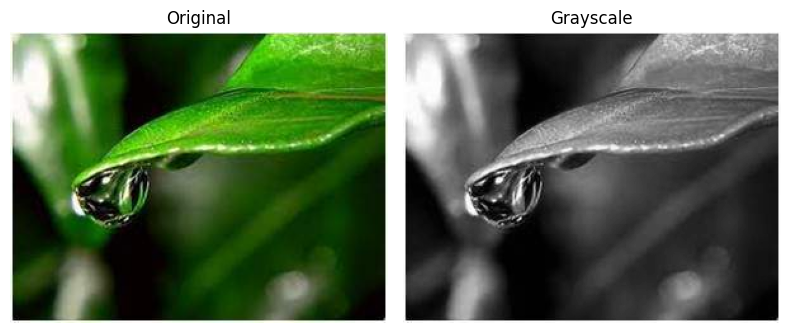

In [6]:
im_gray = io.imread('images_formatos/imagen_RGB.jpg', as_gray=True)
plot2_im_gray(im_skimage, im_gray)

* De **RGB a escala de grises** con la función `convert()` de `PIL`.

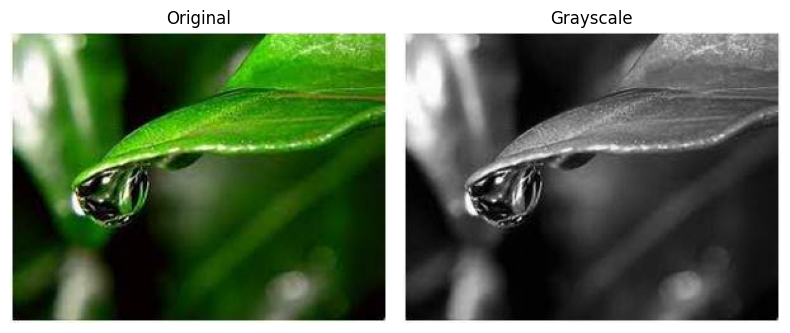

In [7]:
im_pil = Image.open('images_formatos/imagen_RGB.jpg')
im_gray = im_pil.convert('L')
plot2_im_gray(im_pil, im_gray)

* De **RGB a escala de grises** con la función `cv2.imread()` de `OpenCV`.

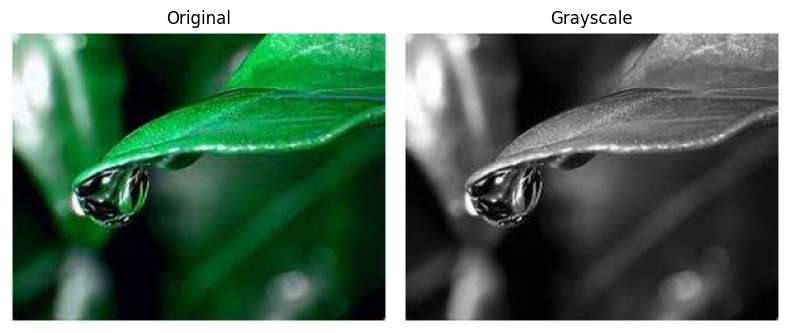

In [8]:
im_cv = cv2.imread('images_formatos/imagen_RGB.jpg')
im_gray = cv2.imread('images_formatos/imagen_RGB.jpg', 0)
plot2_im_gray(im_cv, im_gray)

* De **RGB a escala de grises** con la función `cv2.cvtColor()` de `OpenCV`.

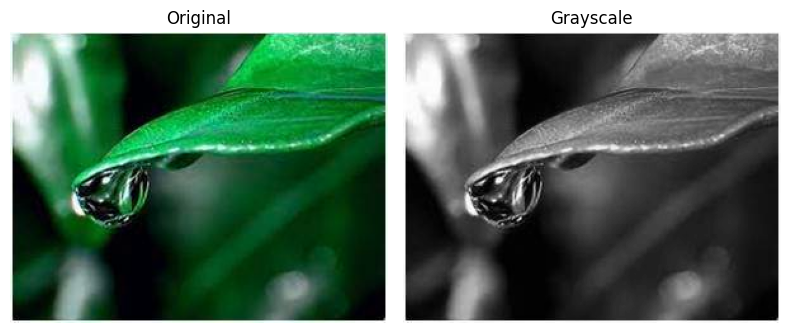

In [9]:
im_gray = cv2.cvtColor(im_cv, cv2.COLOR_BGR2GRAY)
plot2_im_gray(im_cv, im_gray)

* De **RGB a escala de grises** con el paquete `numpy` y diversas transformaciones del color

    **Ejemplo**: Visualiza la imagen RGB `images_formatos/imagen_RGB.jpg` y su tres canales de color (RGB). Además, convierte la imagen RGB a escala de grises siguiendo las siguientes transformaciones: 

    * Forma 1: $Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$
    * Forma 2: $Y = 0.21256 \cdot R + 0.7154 \cdot G + 0.0721 \cdot B$

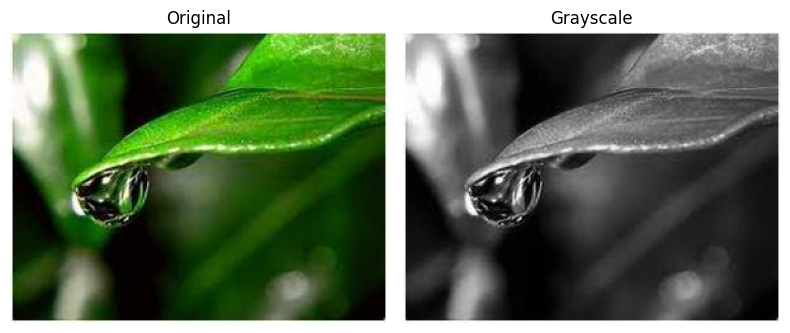

In [10]:
# Forma 1

im = io.imread("images_formatos/imagen_RGB.jpg")
r = im[:, :, 0]
g = im[:, :, 1]
b = im[:, :, 2]

# 0.299 * R + 0.587 * G + 0.114 * B
im_gray = (0.299 * r + 0.587 * g + 0.114 * b)

plot2_im_gray(im, im_gray)

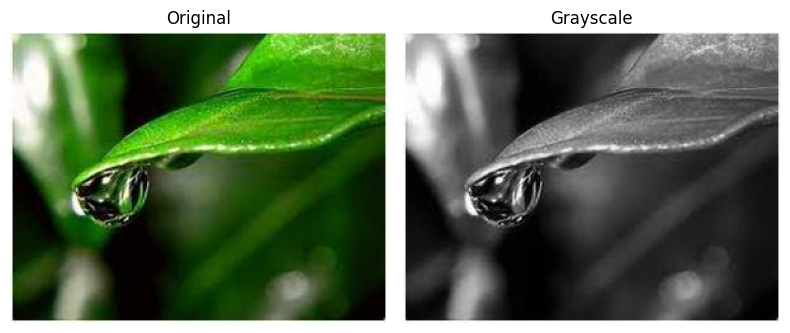

In [11]:
# Forma 2

im = io.imread("images_formatos/imagen_RGB.jpg")

r = im[:, :, 0]
g = im[:, :, 1]
b = im[:, :, 2]

#  0.21256 * R + 0.7154 * G + 0.0721 * B
gray_img = (0.21256 * r + 0.7154 * g + 0.0721 * b)

plot2_im_gray(im, im_gray)

---

* De **RGB a CMYK** y viceversa.

In [12]:
cm_cyans = LinearSegmentedColormap.from_list('cyans', [(0,0,0), (0,1,1)])
cm_yellows = LinearSegmentedColormap.from_list('yellows', [(0,0,0), (1,1,0)])
cm_magentas = LinearSegmentedColormap.from_list('magentas', [(0,0,0), (1,0,1)])

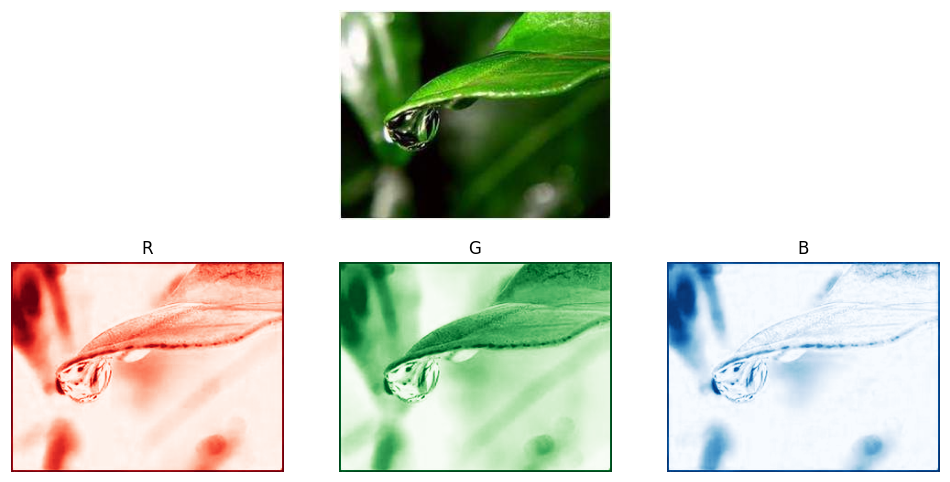

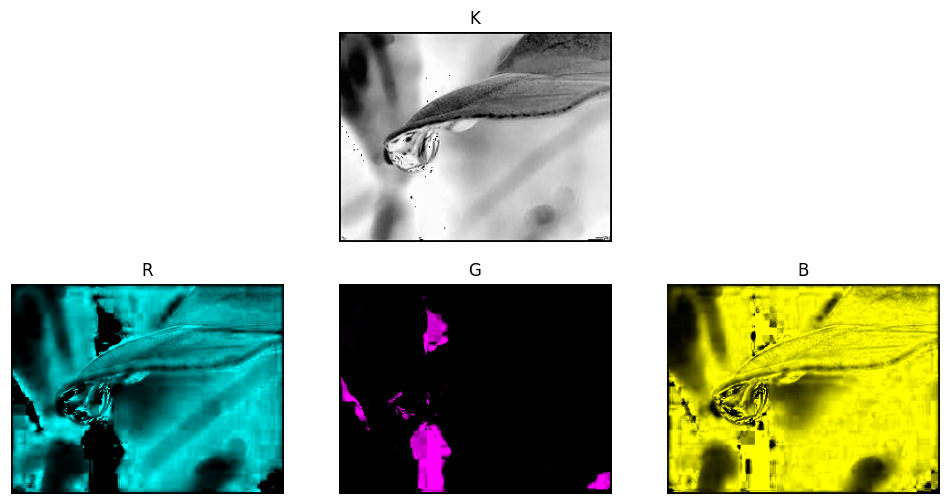

In [13]:
rgb = io.imread("images_formatos/imagen_RGB.jpg")
plotRGB_channels(rgb)

cmyk = RGBtoCMYK(rgb)
plotCMYK_channels(cmyk, [cm_cyans, cm_magentas, cm_yellows])

---

# **Formatos de imagen**

<hr style="border: 1px solid pink" />


### **Formato JPG**

JPG, también conocido como *Joint Photographic Experts Group*, es un popular formato de archivo de imagen. Fue creado en 1992 por el *Joint Photographic Experts Group* para proporcionar un tipo estándar de compresión de imágenes para fotografías digitales. De este modo, los archivos `jpg` pueden ser más pequeños y más fáciles de compartir en línea en comparación con otros tipos de archivo como PNG o GIF.

Entre las ventajas de este formato podemos destacar:

* Tamaño de archivo pequeño, que permite cargar y descargar imágenes jpg más rápidamente que otros formatos.
* Altos niveles de compresión, que permiten que los archivos jpg mantengan la calidad incluso cuando están comprimidos.
* Fácil edición con software de edición fotográfica.
* Amplia gama de usos, incluidos sitios web, plataformas de medios sociales y arte digital.

Como desventajas, podemos citar:

* Degradación de la calidad cuando los archivos jpg se comprimen demasiado.
* Paleta de colores limitada en comparación con otros formatos de archivo como PNG y GIF.
* No son adecuados para imprimir, ya que los archivos jpg no admiten transparencias.
* JPG es un formato con pérdidas, lo que significa que parte de los datos originales se pierden durante la compresión.

<hr style="border: 1px solid pink" />

### **Formato GIF**

Un GIF (*Graphics Interchange Format*) es un archivo de imagen que se anima mediante la combinación de varias imágenes o un solo vídeo. 

Los archivos GIFs suelen usar un algoritmo de comprensión que se denomina codificación LZW que favorece la no degradación y pérdida de calidad de la imagen.

<hr style="border: 1px solid pink" />

### **Formato PNG**

PNG es la sigla de *Portable Network Graphic* (Gráfico de Red Portátil), un tipo de archivo de imagen rasterizado que goza de muchísima popularidad entre los diseñadores web, debido a su capacidad de procesar los gráficos con fondos transparentes o semitransparentes. No se trata de un formato de archivo patentado, por lo que se puede abrir con cualquier software de edición de imágenes sin necesidad de licencias.

Los archivos PNG, que tienen la extensión .png, admiten 16 millones de colores, lo que los diferencia indudablemente de la mayoría de los tipos de archivo.

El formato de imagen PNG se lanzó en 1995. Al experto en TI Oliver Fromme se le ocurrió el nombre de PING, que más tarde se abrevió a PNG.

Los archivos PNG son la evolución del formato GIF, que ya cumplía ocho años cuando se lanzaron los PNG. Los archivos GIF presentaban algunos inconvenientes, como la necesidad de tener una licencia de patente y su limitada gama de tan solo 256 colores, que no se adaptaba a la constante mejora de la resolución de las pantallas de ordenador. Para evitar estos problemas, los archivos PNG se crearon sin patente y con una paleta de colores mucho más variada. A diferencia de los GIF, los PNG son un formato de imagen única y no son compatibles con la animación.

Entre las ventajas de este formato podemos destacar:

* Como los archivos PNG admiten millones de opciones de colores, en lugar de cientos, pueden almacenar imágenes mucho más detalladas que los archivos GIF.
* El PNG es un formato abierto, por lo que los archivos se pueden visualizar y editar en una gran variedad de programas sin necesidad de licencia, al no existir una patente.
* Las imágenes PNG no pierden ninguno de sus datos si se comprimen, de modo que resulta mucho más fácil almacenarlas y transferirlas. Esta es una gran ventaja respecto a las opciones con pérdida de datos como los archivos JPEG, con los que parte de la información desaparece en el proceso de compresión.

Y entre las desventajas, podemos enumerar:

* Como los archivos PNG conservan todos sus datos originales al comprimirse, por lo general, tienen un tamaño muy superior al de los archivos GIF o JPEG y, por consiguiente, ocupan más espacio en el disco duro del ordenador.
* Desde el comienzo, los archivos PNG se diseñaron con la web en mente. Por este motivo, no son compatibles con los modos de color CMYK y puede resultar complicado transferirlos para imprimirlos.
* Aunque los archivos PNG comprimidos contienen datos de imágenes detalladas de alta calidad, su mayor tamaño de archivo conlleva una capacidad de respuesta y un tiempo de carga más lentos.

<hr style="border: 1px solid pink" />

### **Formato TIFF**

Un archivo TIFF, cuyo nombre es la sigla de “Tag Image File Format” (formato de archivo de imágenes con etiquetas), es un archivo informático que se emplea para almacenar información de imágenes y gráficos rasterizados. El TIFF, que es uno de los formatos favoritos de los fotógrafos, es una forma muy práctica de almacenar imágenes de alta calidad antes de editarlas para evitar formatos de archivo con pérdida de datos.

Los archivos TIFF tienen las siguientes características:
* Tienen la extensión .tiff o .tif.
* Se comprimen sin pérdida de datos, por lo que tienen un tamaño superior al de la mayoría de los archivos, pero no se pierde calidad de imagen
* Funciona con Windows, Linux y macOS.

Los TIFF no son los archivos más pequeños que existen, pero permiten al usuario etiquetar información y datos adicionales de las imágenes, como capas extra. 

A mediados de 1980, TAldus Corporation creó el archivo TIFF para la maquetación, un formato que almacena datos de gran calidad y permite publicar contenido directamente desde un ordenador. El archivo TIFF se diseñó como formato de aplicación universal para escáneres de sobremesa, hardware que, hasta entonces, era compatible, en función de la marca y el modelo, solo con un limitado número de formatos de archivo.

En un principio, el TIFF se limitaba a las publicaciones impresas, pero, después, se expandió al contenido web. Más tarde, Adobe adquirió Aldus Corporation, momento desde el que Adobe tiene los derechos de este formato de archivo.

Entre las ventajas de este formato podemos destacar:

* Dado el predominio de la compresión sin pérdida de datos, los archivos TIFF conservan los detalles y la profundidad de color de las imágenes originales lo cual resulta idóneo para las fotografías profesionales de gran calidad.
* Los impresionantes detalles de los archivos TIFF los hacen perfectos para realizar digitalizaciones de alta resolución, como para hacer una copia de seguridad de tus trabajos creativos hechos a mano y de tus documentos personales.
* Los archivos TIFF son un formato de archivo universal y adaptable, por lo que pueden usarse con los principales sistemas operativos.
* El archivo TIFF puede funcionar como contenedor de archivos JPEG de menor tamaño: almacena varias imágenes en un gráfico rasterizado principal.
* Los archivos TIFF son una gran opción para almacenar imágenes de alta resolución antes de la edición y la creación de activos.

Y sobre las desventajas podemos decir que:

* Los TIFF son archivos de gran tamaño debido a sus detalles y su resolución, por lo que pueden ocupar un espacio valiosísimo del disco duro.
* Dado su gran tamaño, resulta complicado compartirlos o enviarlos a contactos o clientes.
* No son una buena opción para el diseño de sitios web debido a su alta calidad, puesto que las imágenes tan detalladas pueden ralentizar la velocidad de carga. Otros formatos más ligeros, como el JPEG, son más prácticos para las imágenes online.
